In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
happiness_score = pd.read_csv(url, sep=',')
happiness_score.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
#data analysis
happiness_score.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
happiness_score.shape

(158, 12)

In [8]:
happiness_score.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


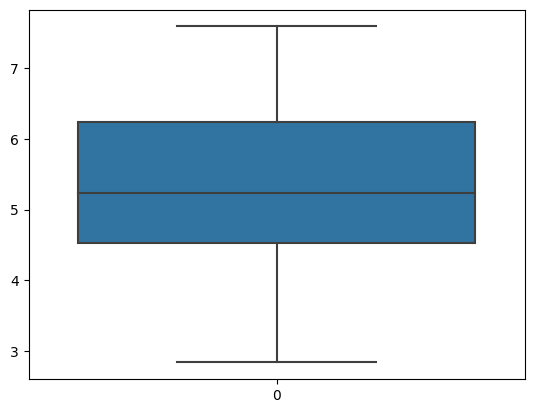

In [9]:
# Univariate Analysis for the target variable "Happiness Score"

import seaborn as sns
sns.boxplot(happiness_score['Happiness Score'])
plt.show()

# The output graph shows no outliers

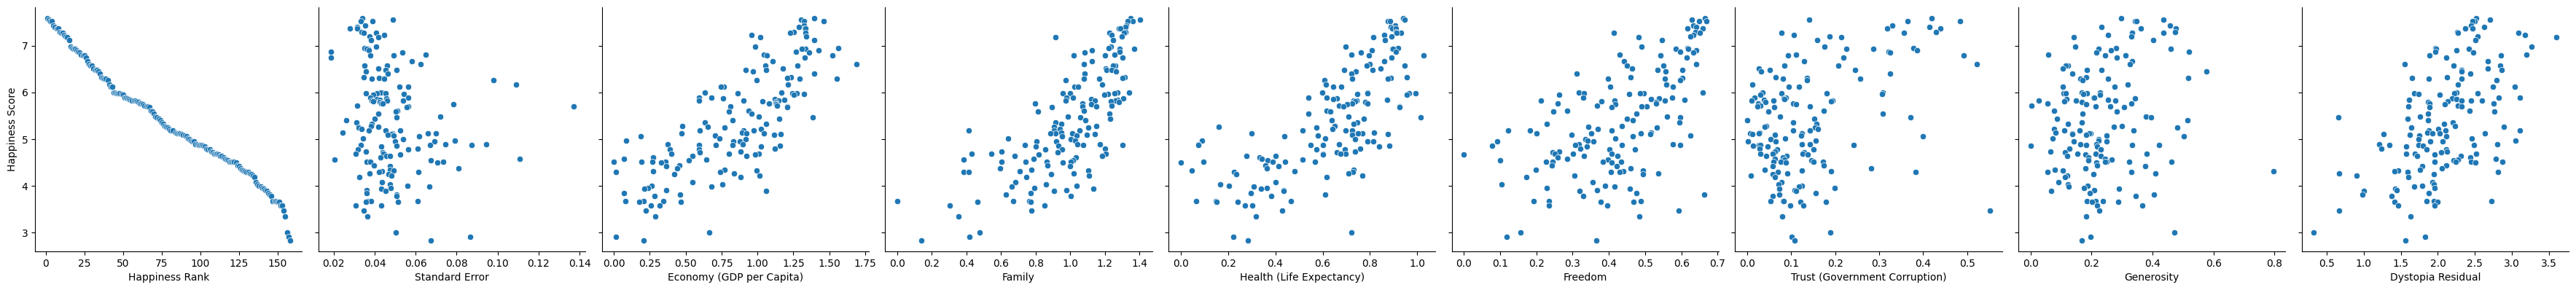

In [10]:
# Showing relation of Happiness Score with other variables

sns.pairplot(happiness_score, x_vars=['Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                                      'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'], y_vars='Happiness Score', height=4, aspect=1, kind='scatter')
plt.show()

<ipython-input-3-8613d1d51821>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(happiness_score.corr())


<Axes: >

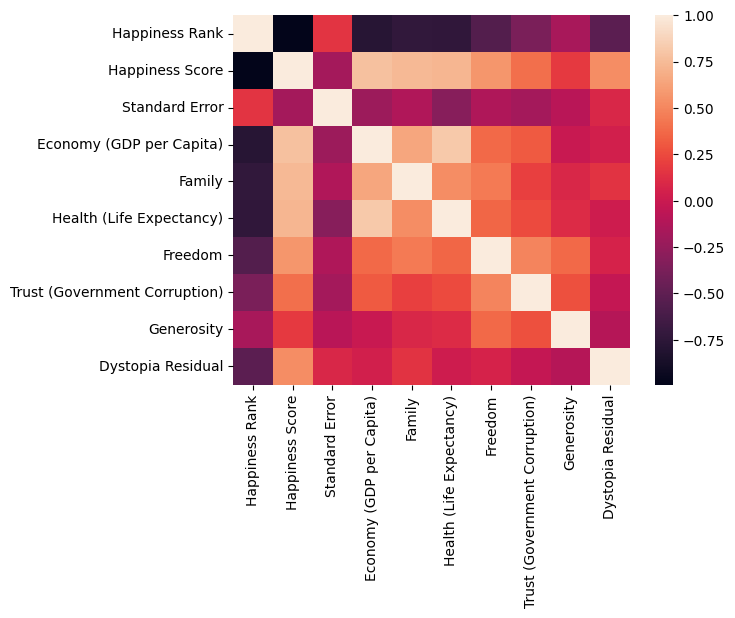

In [3]:
import seaborn as sns
sns.heatmap(happiness_score.corr())

In [12]:
# Define the order of variables in order to build model
new_column_order = ['Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                                      'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Happiness Score']

# Reindex the DataFrame with the new column index order
happiness_data = happiness_score.reindex(columns=new_column_order)
happiness_data.head()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [13]:
# Model Building

X = happiness_data.iloc[:, :-1].values
y = happiness_data.iloc[:, 9].values

In [14]:
y

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073,
       5.057, 5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876,
       4.874, 4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715,
       4.694, 4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565,
       4.55 , 4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369,
       4.35 , 4.332,

In [29]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=123)

In [30]:
# Build the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict on the test data
y_pred = model.predict(X_test)
y_pred

array([6.78624011, 6.79764537, 4.55062556, 5.09758951, 4.07667534,
       5.10164206, 5.07327221, 3.84494592, 3.3399693 , 2.83899306,
       3.98877034, 5.85521501, 3.9556308 , 3.89642044, 7.28597192,
       5.69527597, 6.12283116, 5.36021857, 4.21842634, 6.13020403,
       7.18721407, 4.29646997, 6.48510688, 6.45476242, 6.30247309,
       5.75856425, 5.42855498, 5.7906068 , 6.86718838, 6.29816325,
       6.57500547, 5.77042324, 4.97126158, 7.36354638, 4.7995918 ,
       7.42685375, 5.754439  , 4.50724821, 6.57407071, 3.93083916,
       7.58679645, 5.12316138, 4.56456031, 4.33206403, 3.67773943,
       4.57153265, 7.40593233, 6.94613089])

In [33]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 9.64864308050225e-08


In [34]:
# Calculating the coefficients

print(model.coef_)

[-5.55314544e-06  1.21324207e-03  9.99865201e-01  9.99912722e-01
  9.99575056e-01  9.99350003e-01  9.99635847e-01  1.00003174e+00
  9.99823166e-01]


In [35]:
# Calculating the R-squared value

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999999376162431